In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

df_sampling = pd.read_csv('C:\\Users\\lucia\\Desktop\\DielModels\\reconstruction_results\\MODEL1507180028\\results_troppo\\DielModel\\dfa\\diel_model_sampling.csv')

In [2]:
reactions_data = df_sampling.iloc[:, 1:].values

In [3]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(reactions_data)

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(reactions_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])

df_transposto = df_sampling.T

In [4]:
df_transposto = df_transposto.iloc[1:]

In [5]:
df_transposto

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Bc1_Day,0.048496,0.048498,0.031564,0.030808,0.025498,0.021334,0.020605,0.019839,0.018914,0.014345,...,0.015938,0.016243,0.015904,0.016144,0.016247,0.016517,0.015755,0.016099,0.015908,0.015947
Bc2_Day,0.087842,0.087845,0.057172,0.055803,0.046185,0.038642,0.037323,0.035935,0.034259,0.025983,...,0.028870,0.029422,0.028807,0.029242,0.029429,0.029917,0.028537,0.029161,0.028814,0.028885
Bc3_Day,0.279082,0.279091,0.181641,0.177290,0.146732,0.122770,0.118577,0.114168,0.108843,0.082551,...,0.091721,0.093476,0.091523,0.092906,0.093497,0.095050,0.090666,0.092646,0.091545,0.091770
Bc4_Day,0.242481,0.242489,0.157819,0.154039,0.127489,0.106669,0.103026,0.099195,0.094568,0.071725,...,0.079692,0.081217,0.079520,0.080721,0.081235,0.082585,0.078775,0.080495,0.079539,0.079735
Bc5_Day,0.258037,0.258045,0.167943,0.163921,0.135667,0.113512,0.109635,0.105559,0.100635,0.076326,...,0.084804,0.086427,0.084621,0.085900,0.086446,0.087882,0.083829,0.085659,0.084641,0.084850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Starch_p_Night_sp_exchange_reverse,0.002238,0.002314,0.023755,1.754552,7.830121,7.333227,9.726924,9.911646,9.292930,15.104110,...,270.931557,279.731041,284.974679,279.155599,281.312603,280.029802,285.475117,291.262168,297.431250,294.484593
D-Fructose_Night_sp_exchange_reverse,0.553694,0.553495,0.331743,2.208337,8.431086,8.142064,10.498726,13.302823,12.708928,19.617118,...,243.512244,253.882803,259.987267,254.199576,257.396119,256.113335,262.267296,267.714588,274.013121,268.722629
(S)-Malate_c_Night_sp_exchange_reverse,0.125446,0.129340,0.249174,1.977732,7.988150,7.506741,9.856553,10.105703,9.378393,15.203033,...,225.368192,235.387066,241.089944,235.486599,237.724277,236.227190,241.040433,246.939668,253.296025,249.388308
Fumarate_Night_sp_exchange_reverse,0.241222,0.241289,0.258475,2.017342,2.383572,1.861227,4.190070,4.388430,3.658929,9.461007,...,274.421314,285.266797,290.132449,284.341172,286.418265,285.100638,290.617534,296.336316,302.592398,298.678568


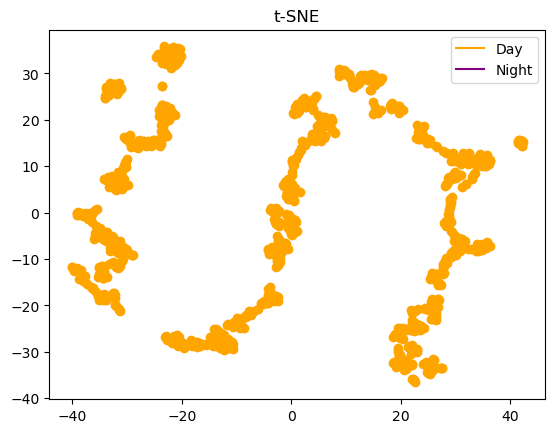

In [6]:
labels = ['Day' if 'Day' in rxn else 'Night' for rxn in df_transposto.index]

color_map = {'Day': 'orange', 'Night': 'purple'}

for i, row in tsne_df.iterrows():
    category = labels[i]
    color = color_map[category]
    plt.scatter(row['t-SNE1'], row['t-SNE2'], color=color)

plt.legend(handles=[plt.Line2D([], [], color='orange', label='Day'),
                    plt.Line2D([], [], color='purple', label='Night')])

plt.title('t-SNE')
plt.savefig('C:\\Users\\lucia\\Desktop\\DielModels\\PCA + T-SNE\\gráfico_t-sne_df_original.png')
plt.show()

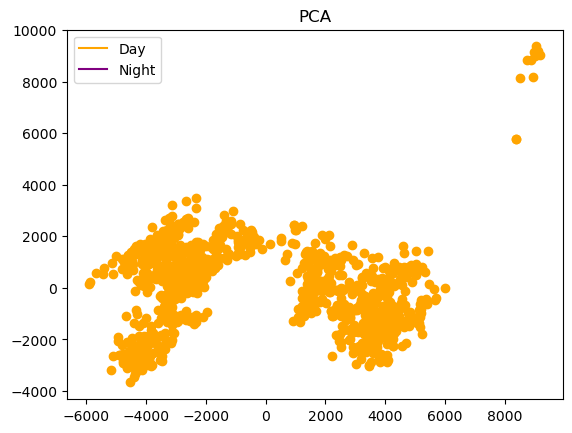

In [7]:
color_map = {'Day': 'orange', 'Night': 'purple'}

for i, row in pca_df.iterrows():
    category = labels[i]
    color = color_map[category]
    plt.scatter(row['PC1'], row['PC2'], color=color)

plt.legend(handles=[plt.Line2D([], [], color='orange', label='Day'),
                    plt.Line2D([], [], color='purple', label='Night')])

plt.title('PCA')
plt.savefig('C:\\Users\\lucia\\Desktop\\DielModels\\PCA + T-SNE\\gráfico_pca_df_original.png')
plt.show()